In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [3]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [13]:
url='https://raw.githubusercontent.com/gamzebb/group-project/refs/heads/main/finbert_sentiment.csv'
finbert_sentiment = pd.read_csv(url)

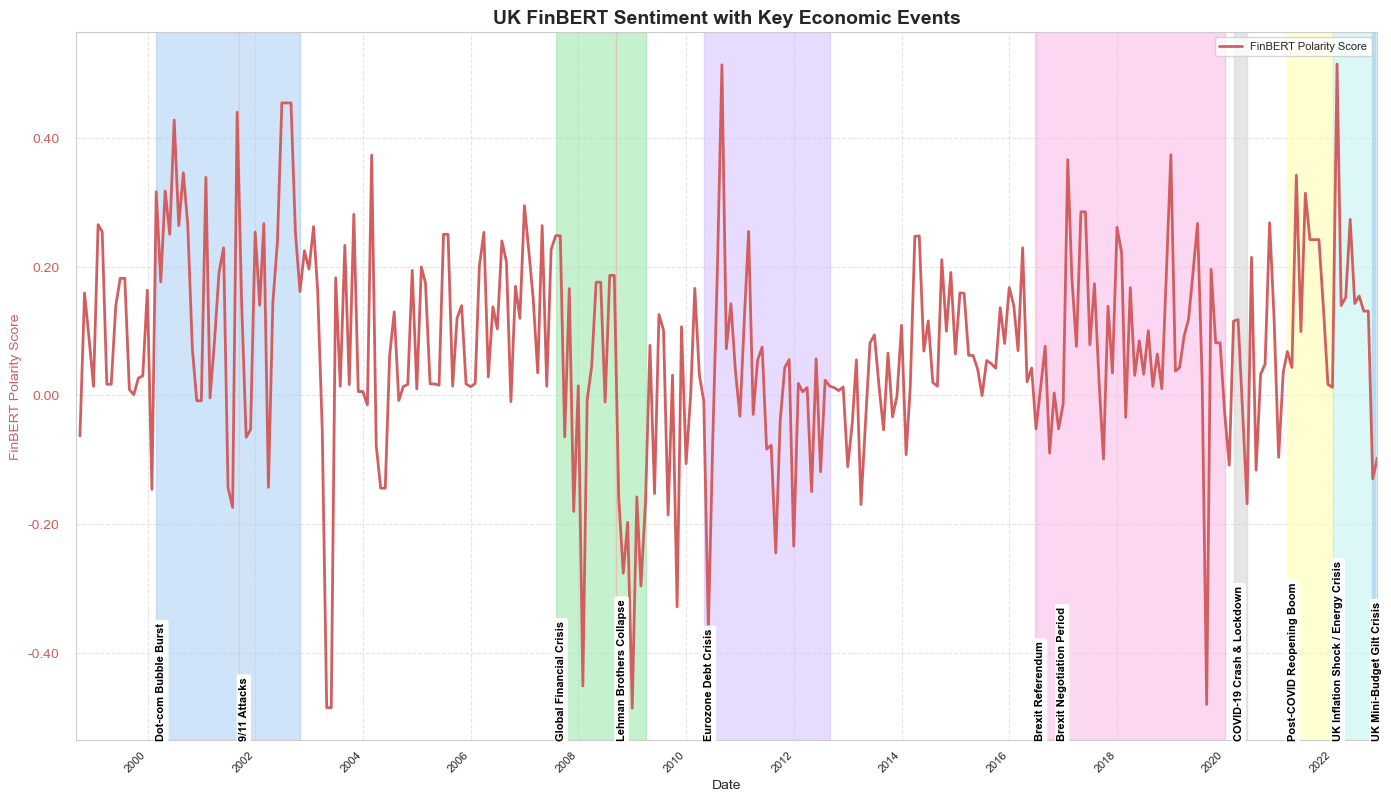

In [19]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('1998-09-01')
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'])  # Ensure datetime
df_plot = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot = df_plot.dropna(subset=['polarity_score_finbert'])
# Filter and resample sentiment
monthly = finbert_sentiment[(finbert_sentiment['Date'] >= "1997-01-01") & (finbert_sentiment['Date'] <= "2022-12-31")].copy()
monthly['Date'] = pd.to_datetime(monthly['Date'])  # ensure datetime
monthly.set_index("Date", inplace=True)
monthly = monthly.resample("ME").mean(numeric_only=True).ffill().reset_index()

# Define key economic events
events = {
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Plot setup
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Plot FinBERT sentiment
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('FinBERT Polarity Score', color='#d35e60', fontsize=10)
ax.plot(monthly['Date'], monthly['polarity_score_finbert'], color='#d35e60', label='FinBERT Polarity Score', linewidth=2)
ax.tick_params(axis='y', labelcolor='#d35e60', size=8)

# Event Shading and Labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_fontsize = 8
label_positions = {}
i = 0

brexit_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_end
label_positions['Brexit Negotiation Period'] = brexit_end + pd.Timedelta(days=150)

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    if end >= start_date:
        display_start = max(start, start_date)
        ax.axvspan(display_start, end, color=event_colors[i % len(event_colors)], alpha=0.5)
        label_x_pos = label_positions.get(event_name, display_start)

        ax.text(label_x_pos, 0,
                event_name.split('(')[0].strip(),
                rotation=90,
                fontsize=label_fontsize,
                color='black',
                fontweight='bold',
                ha='left',
                va='bottom',
                transform=ax.get_xaxis_transform(),
                zorder=5,
                bbox=dict(
                    facecolor='white',
                    alpha=1,
                    edgecolor='none',
                    boxstyle='round,pad=0.2'
                ))
        i += 1

# Titles and formatting
plt.title('UK FinBERT Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Legend and grid
ax.legend(loc='upper right', fontsize=8)
ax.grid(True, which='major', linestyle='--', alpha=0.5)
ax.set_xlim(start_date, monthly['Date'].max())
#ax.set_ylim(-0.5, 0.5)

plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_13448\3676557493.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = monthly.set_index("Date").resample("M").mean(numeric_only=True).ffill().reset_index()


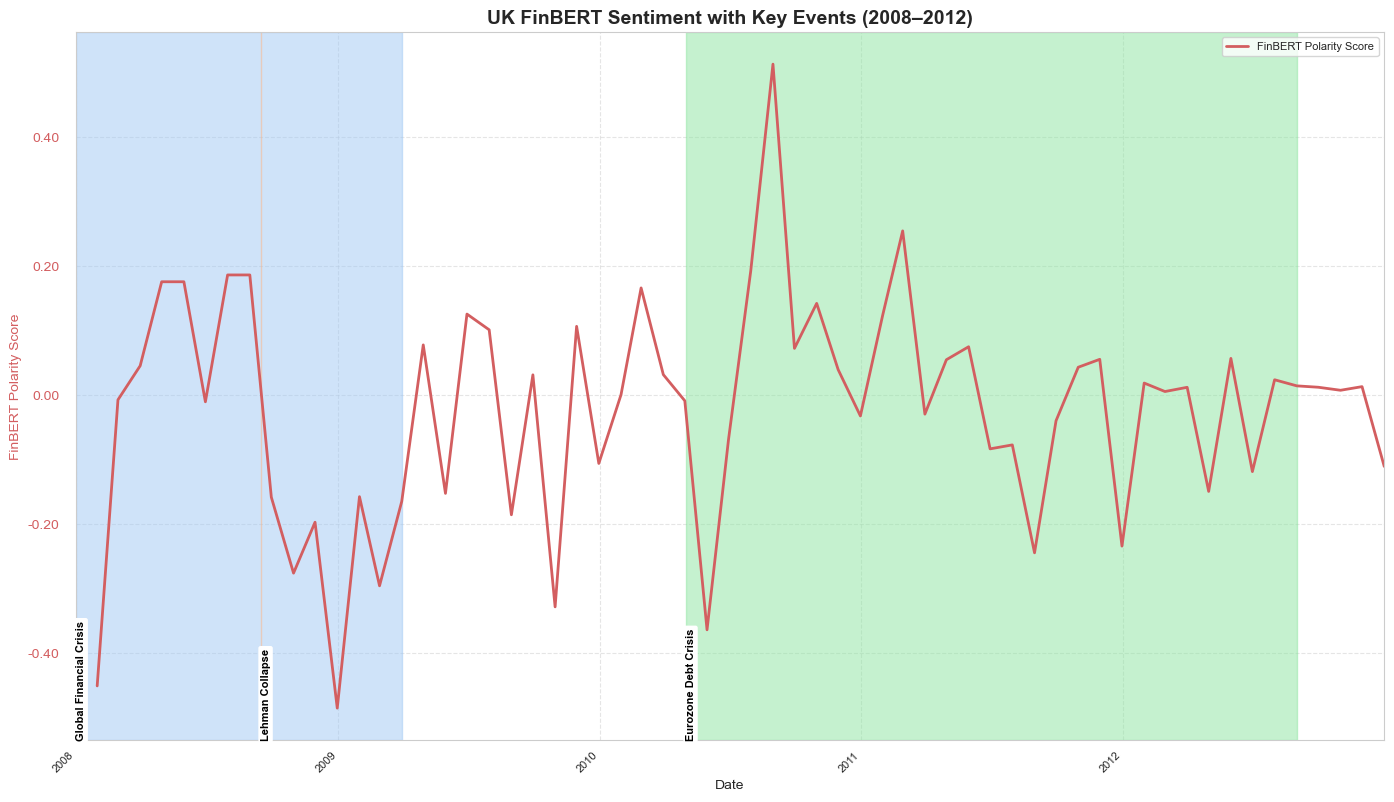

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Ensure datetime and filter for 2008–2012
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'])
df_plot = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()
df_plot = df_plot.dropna(subset=['polarity_score_finbert'])

# Filter and resample sentiment
monthly = finbert_sentiment.copy()
monthly['Date'] = pd.to_datetime(monthly['Date'])
monthly = monthly[(monthly['Date'] >= start_date) & (monthly['Date'] <= end_date)]
monthly = monthly.set_index("Date").resample("M").mean(numeric_only=True).ffill().reset_index()

# Define 2008–2012 events
events = {
    'Global Financial Crisis': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'}
}

# Plot setup
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Plot FinBERT sentiment
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('FinBERT Polarity Score', color='#d35e60', fontsize=10)
ax.plot(monthly['Date'], monthly['polarity_score_finbert'], color='#d35e60', label='FinBERT Polarity Score', linewidth=2)
ax.tick_params(axis='y', labelcolor='#d35e60', size=8)

# Event Shading and Labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_fontsize = 8
i = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])
    if end >= start_date:
        display_start = max(start, start_date)
        ax.axvspan(display_start, end, color=event_colors[i % len(event_colors)], alpha=0.5)
        ax.text(display_start, 0,
                event_name,
                rotation=90,
                fontsize=label_fontsize,
                color='black',
                fontweight='bold',
                ha='left',
                va='bottom',
                transform=ax.get_xaxis_transform(),
                zorder=5,
                bbox=dict(facecolor='white', alpha=1, edgecolor='none', boxstyle='round,pad=0.2'))
        i += 1

# Titles and formatting
plt.title('UK FinBERT Sentiment with Key Events (2008–2012)', fontsize=14, fontweight='bold')
fig.tight_layout()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Legend and grid
ax.legend(loc='upper right', fontsize=8)
ax.grid(True, which='major', linestyle='--', alpha=0.5)
ax.set_xlim(start_date, end_date)

plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_13448\1446580388.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = monthly.set_index("Date").resample("M").mean(numeric_only=True).ffill().reset_index()


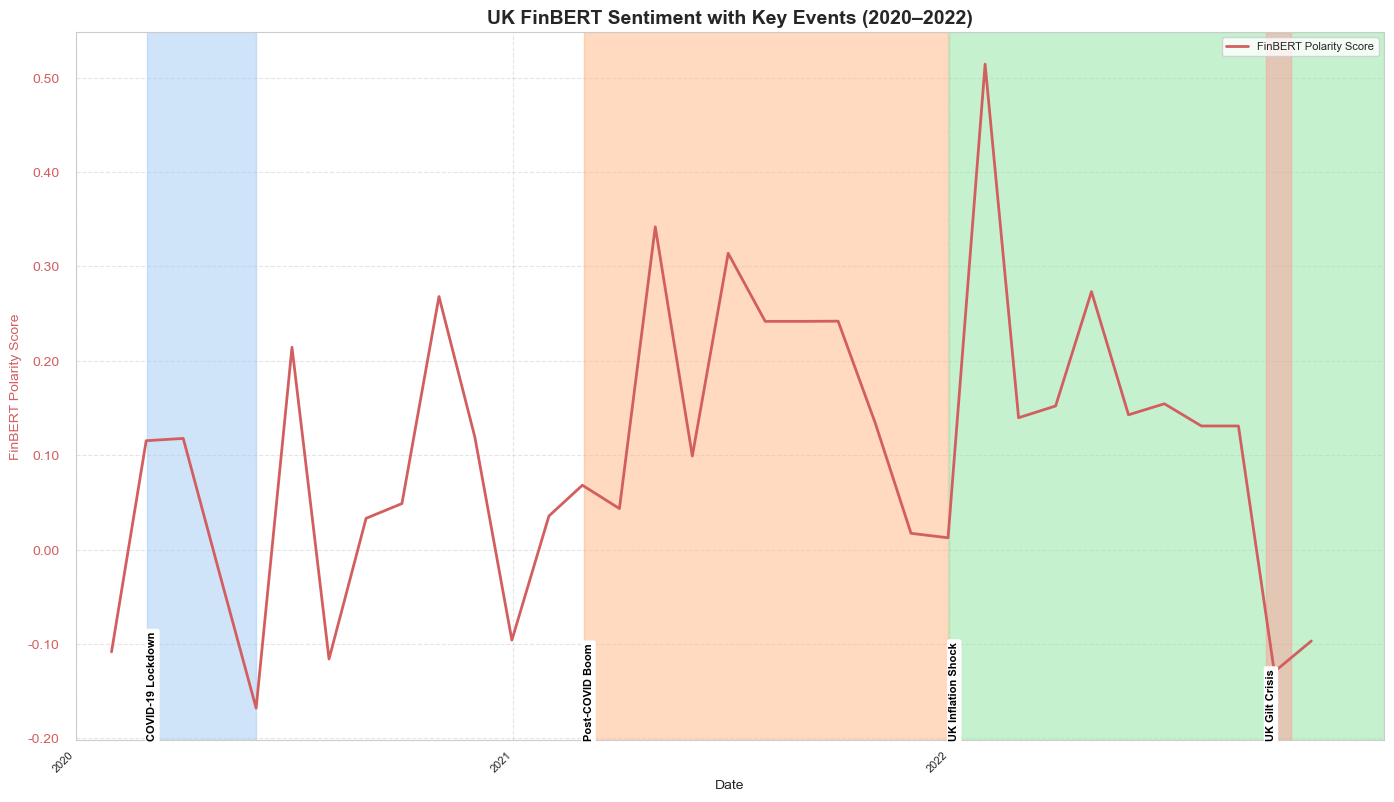

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Define the date range for 2020–2022
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2022-12-31')

# Ensure datetime format and filter for 2020–2022
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'])
df_plot = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()
df_plot = df_plot.dropna(subset=['polarity_score_finbert'])

# Filter and resample FinBERT sentiment monthly
monthly = finbert_sentiment.copy()
monthly['Date'] = pd.to_datetime(monthly['Date'])
monthly = monthly[(monthly['Date'] >= start_date) & (monthly['Date'] <= end_date)]
monthly = monthly.set_index("Date").resample("M").mean(numeric_only=True).ffill().reset_index()

# Define 2020–2022 events
events = {
    'COVID-19 Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Plot setup
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Plot FinBERT sentiment
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('FinBERT Polarity Score', color='#d35e60', fontsize=10)
ax.plot(monthly['Date'], monthly['polarity_score_finbert'], color='#d35e60', label='FinBERT Polarity Score', linewidth=2)
ax.tick_params(axis='y', labelcolor='#d35e60', size=8)

# Event Shading and Labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_fontsize = 8
i = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])
    if end >= start_date:
        display_start = max(start, start_date)
        ax.axvspan(display_start, end, color=event_colors[i % len(event_colors)], alpha=0.5)
        ax.text(display_start, 0,
                event_name,
                rotation=90,
                fontsize=label_fontsize,
                color='black',
                fontweight='bold',
                ha='left',
                va='bottom',
                transform=ax.get_xaxis_transform(),
                zorder=5,
                bbox=dict(facecolor='white', alpha=1, edgecolor='none', boxstyle='round,pad=0.2'))
        i += 1

# Titles and formatting
plt.title('UK FinBERT Sentiment with Key Events (2020–2022)', fontsize=14, fontweight='bold')
fig.tight_layout()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Legend and grid
ax.legend(loc='upper right', fontsize=8)
ax.grid(True, which='major', linestyle='--', alpha=0.5)
ax.set_xlim(start_date, end_date)

plt.show()